# 10 EM rounds, 100 samples

## Inference

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import sys
base_dir = os.path.join(os.getcwd(), os.pardir)
sys.path.append(base_dir)
# Models

from Models.LatentFactorModels import ThreeNodeGaussianModel
from Simulators.Simulator import Simulator
from Models.ModelComparer import ModelComparer
import numpy as np
np.random.seed(seed=101)




Make model to simulate from

In [2]:
(m, p_0, p_1, p_2, p_3) = (2,3,5,5,5)
genModel = ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3)

Parameters $\mathbf{W}, \mathbf{\Psi}$ set randomly with element-wise mean 2 for $\mathbf{W}$; 100 EM rounds, 100 samples simulated. 

In [4]:
_ = genModel.initializeParameters(psiMean = 2, wMean=2, warm_start=False)

In [11]:
simulator = Simulator(genModel)
simulator.simulate(100)

Make model to fit and compare with original

In [12]:
fitModel = ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3)

fitModel = ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3)
generatingX =genModel.getObservedData().iloc[:, 0:genModel.feature_dim]

generatingY = genModel.getObservedData().iloc[
                         :, genModel.feature_dim:(genModel.response_dim+ genModel.feature_dim)]

fitModel = fitModel.fit(X=generatingX, y=generatingY, num_EM_rounds = 10)

Compare fit to generated 

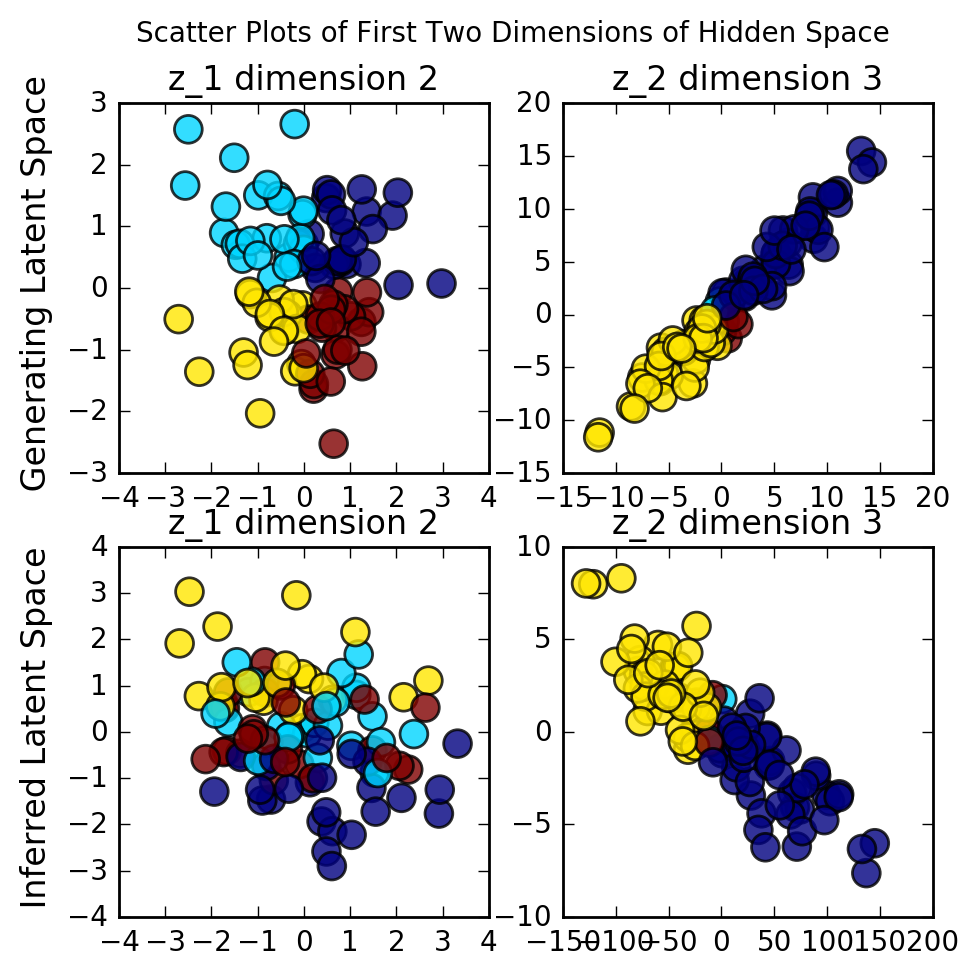

In [13]:
comparer = ModelComparer(genModel, fitModel)
comparer.compareScatterPlotZ()

 $\vec{z_1}$ looks pretty decent. 

$\vec{z}_2$ is way too diagonalized, but this is probably okay becuase what we're looking at is $E[\vec{z}_2 | \vec{x}]$ for the recovered versus just $\vec{z}_2$ for the generating.

Now, parameters

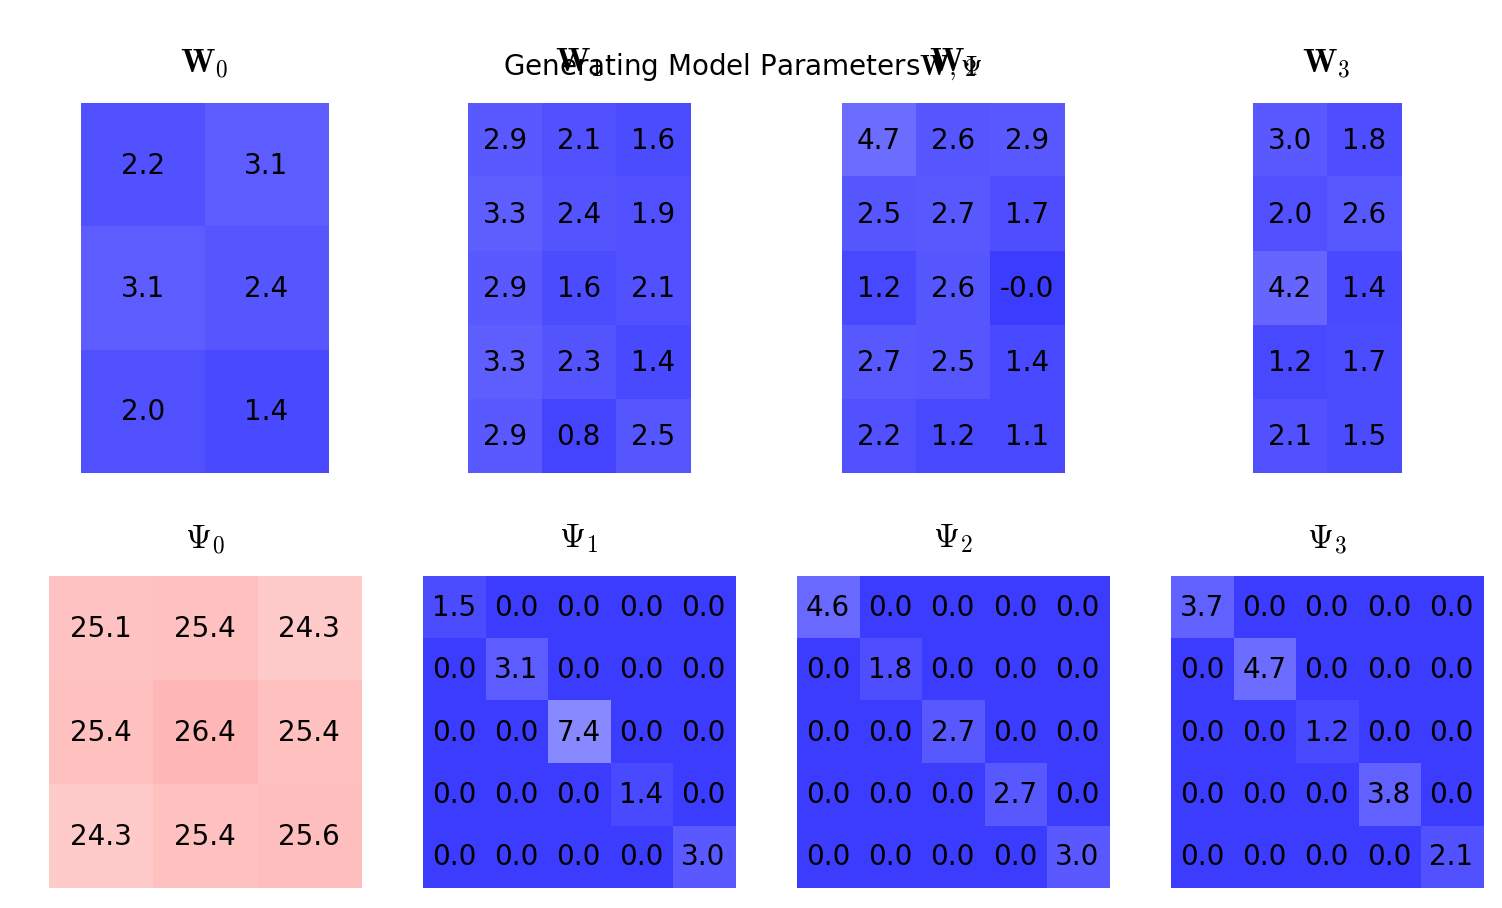

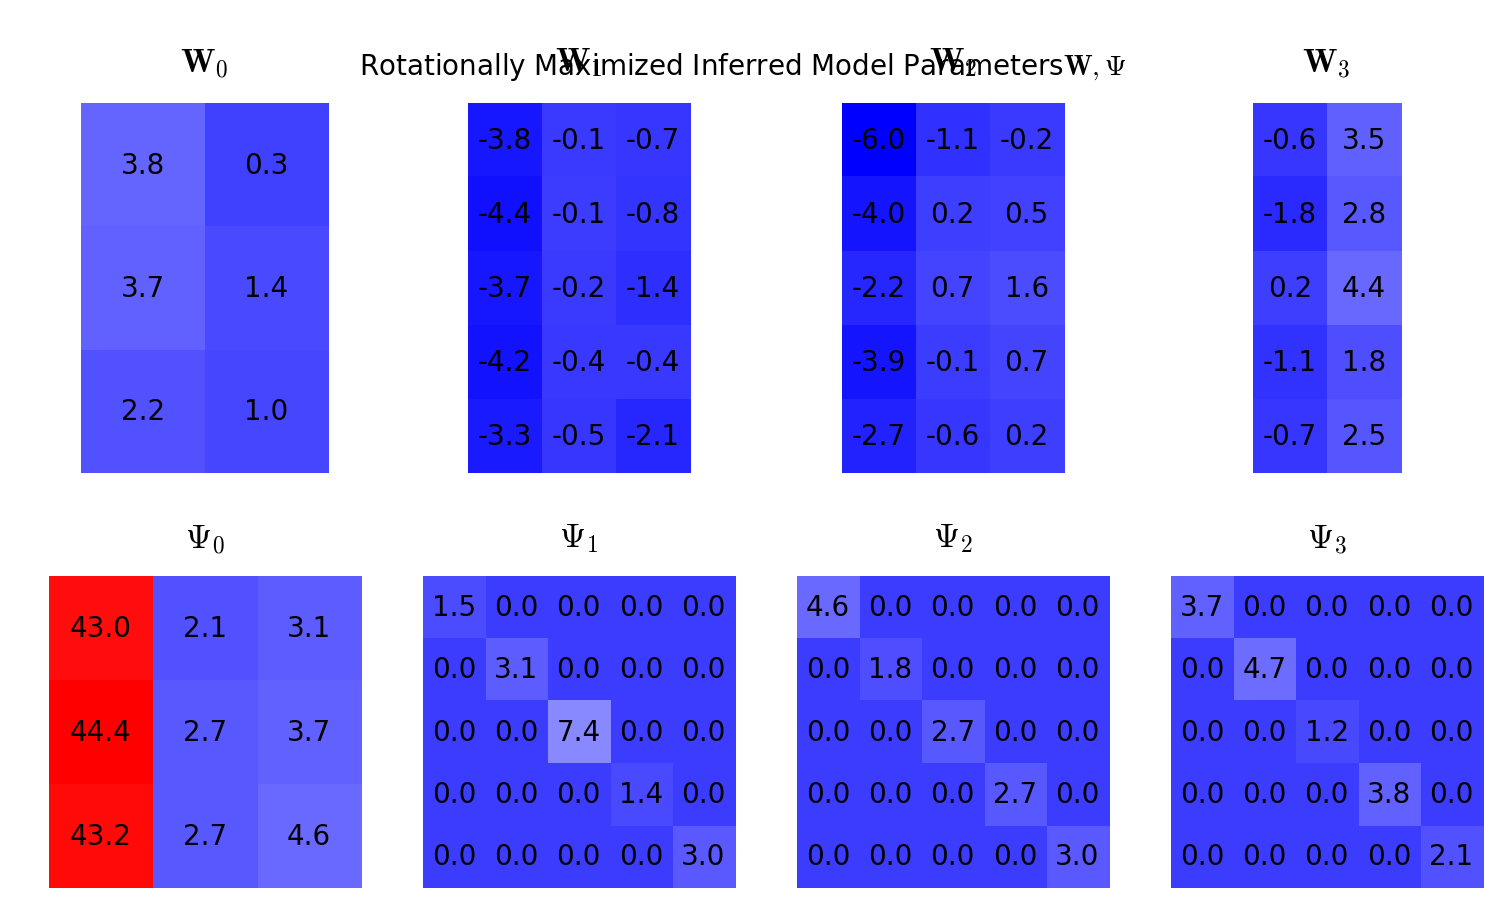

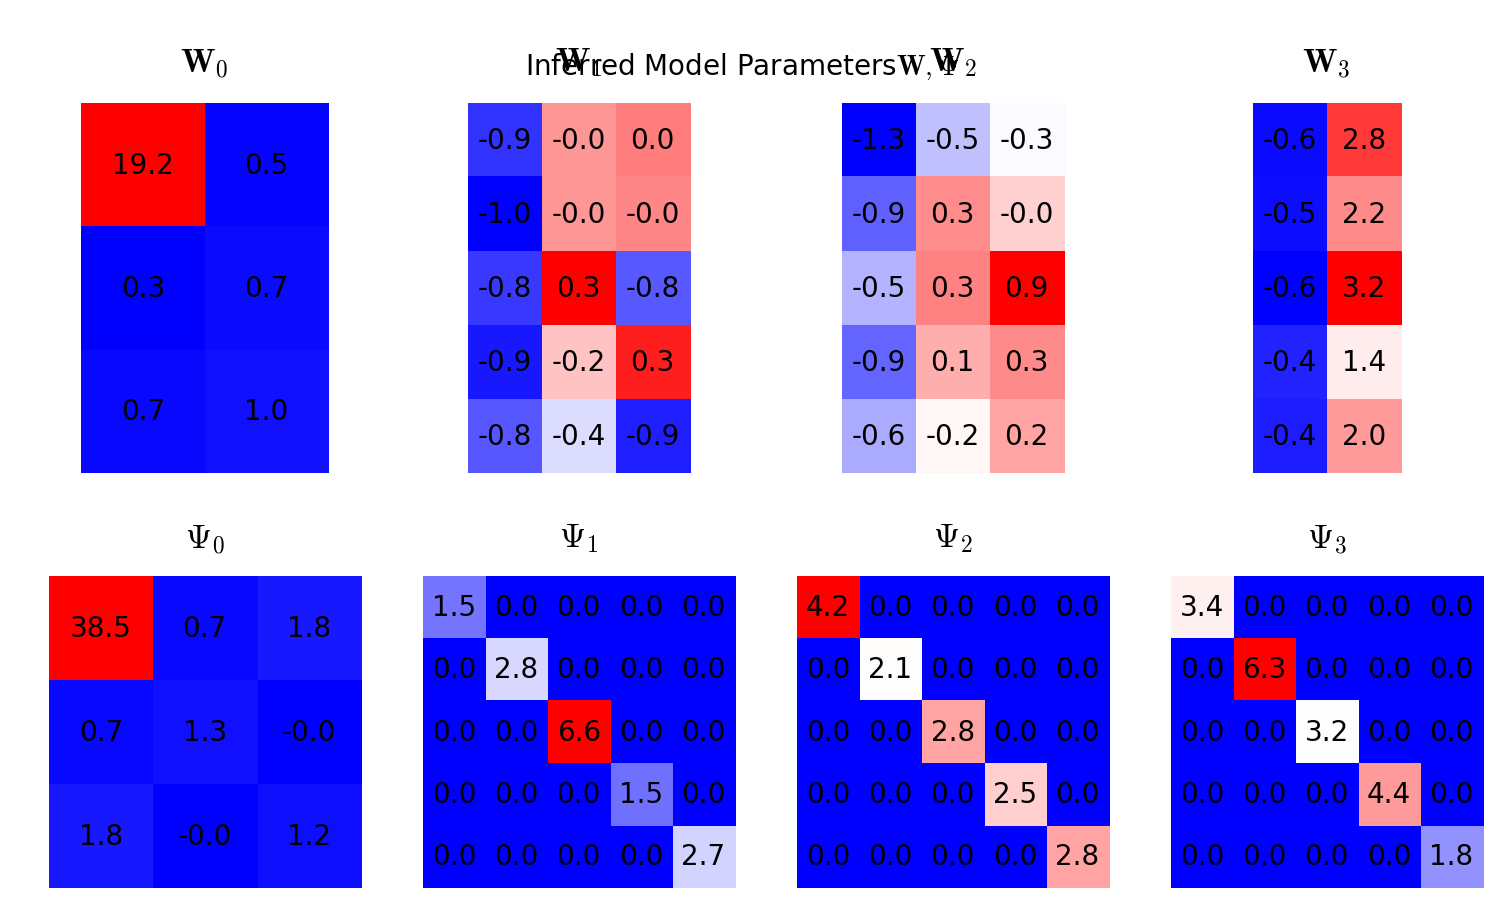

In [10]:
comparer.compareParameters()

$\Rightarrow$ $\mathbf{\Psi}_1, \mathbf{\Psi}_2, \mathbf{\Psi}_3$ are perfect after rotating. $\mathbf{W}$'s and $\mathbf{\Psi}_0$ are very close up to a column-wise sign after rotating. 

## Prediction

### First 5

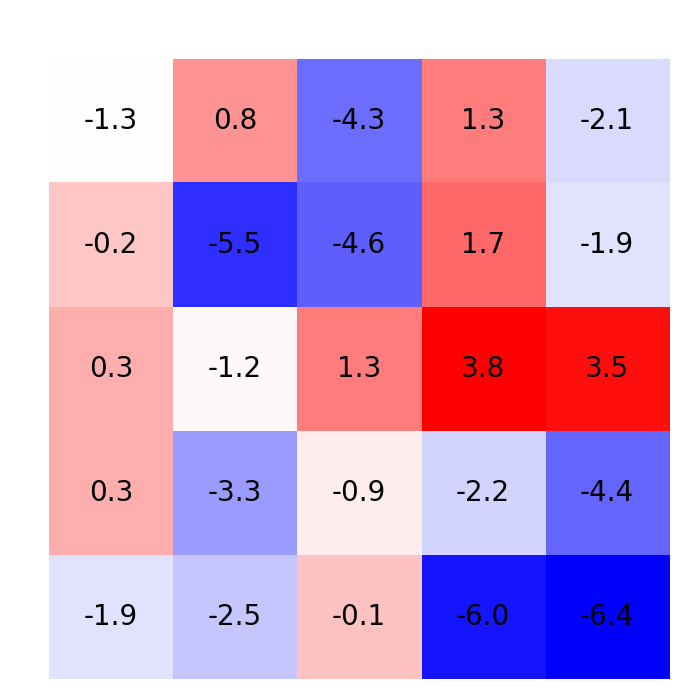

In [67]:
import matplotlib.pyplot as plt
# Plot generating, first 10
y_hat = fitModel.predict(X=generatingX)

mc = ModelComparer(None,None)
mc.make_matrix_heatmap(data=generatingY.as_matrix()[range(5),:], axis=plt)



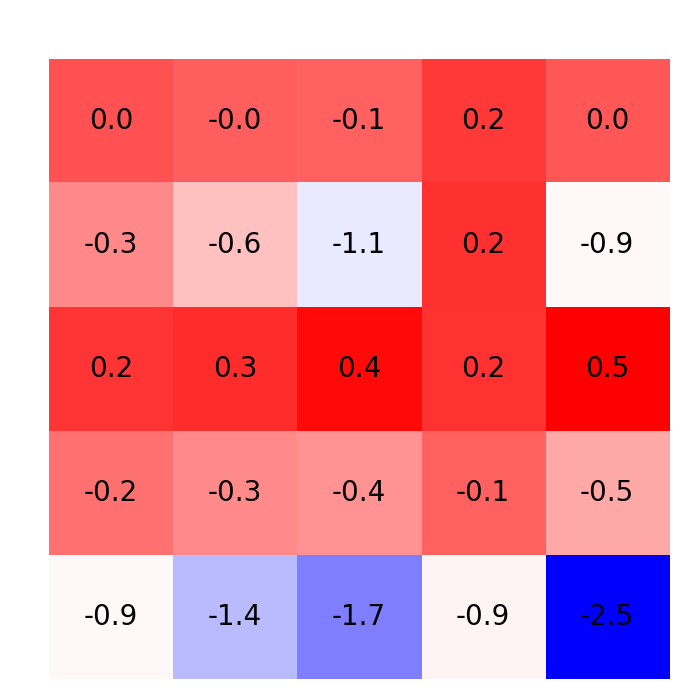

In [68]:
 mc.make_matrix_heatmap(data=y_hat.T[range(5),:], axis=plt)

⇒ really good with 100 samples...

## Compare PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


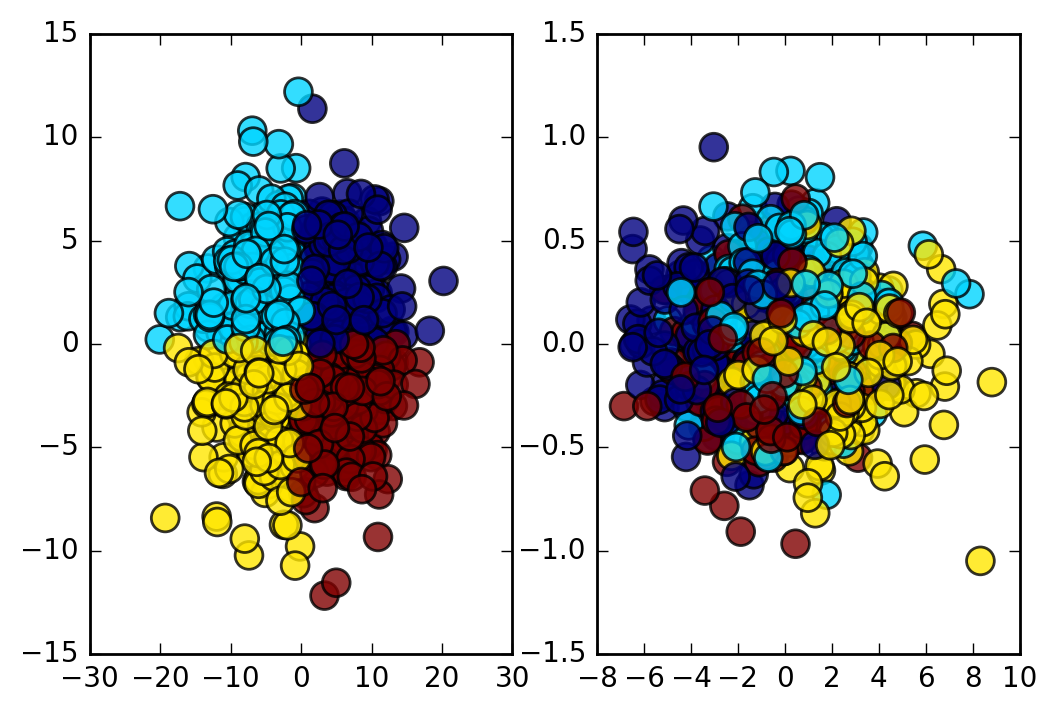

In [69]:
%load_ext autoreload
%autoreload

ModelComparer.compare_pca(generatingY, y_hat.T)
#ModelComparer.plot_pca(y_hat.T)

⇒ looks really good!

# Trying with more EM Rounds

In [13]:
np.random.seed(seed=101)
fitModelHundredRounds = ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3)
fitModelHundredRounds.fit(genModel.getObservedData(), num_EM_rounds = 100)

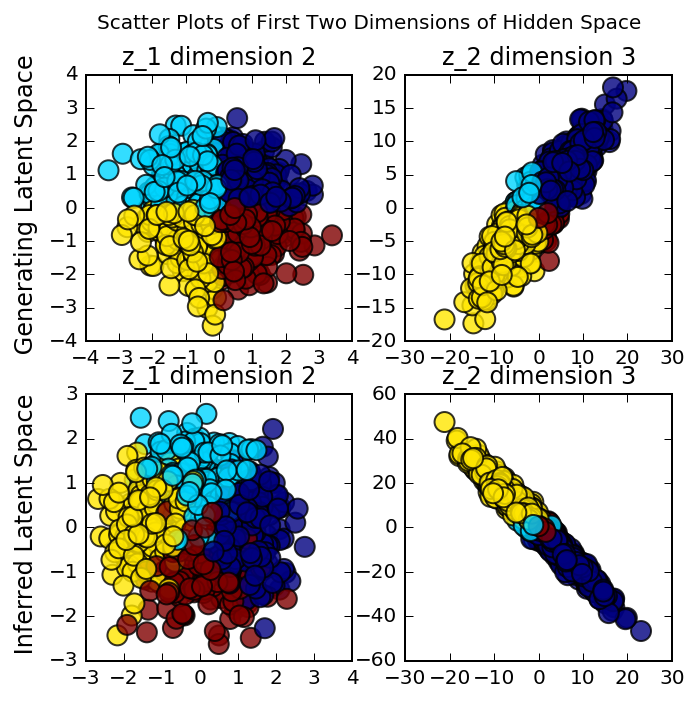

In [10]:
comparerHundredRounds = ModelComparer(genModel, fitModelHundredRounds)
comparerHundredRounds.compareScatterPlotZ()

This causes $\vec{z}_2$ to look better. Looks really good. 

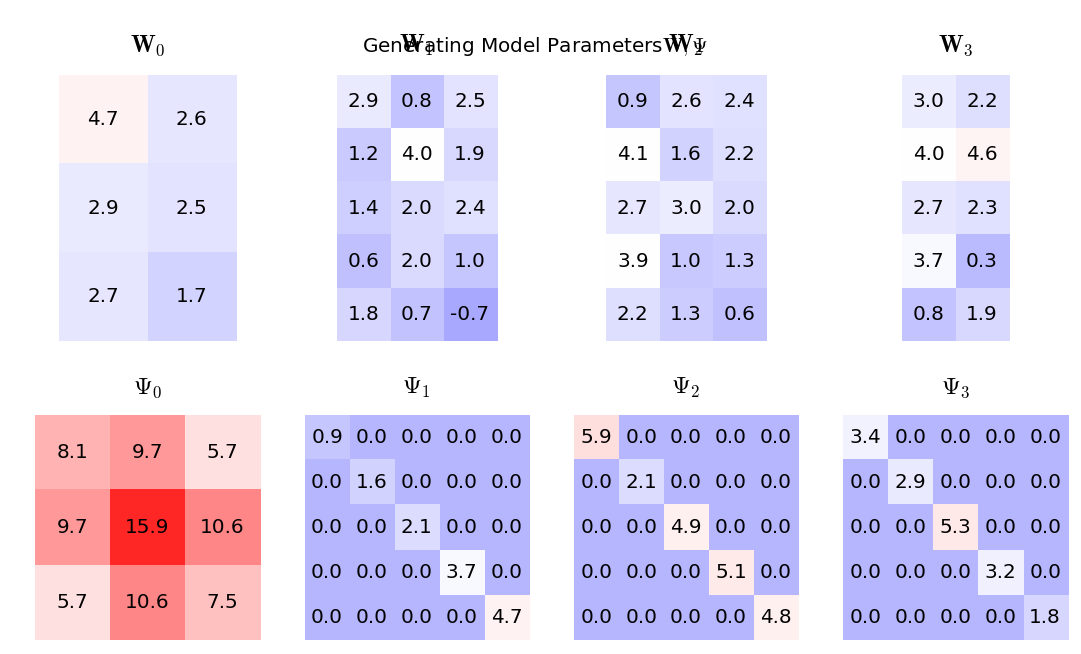

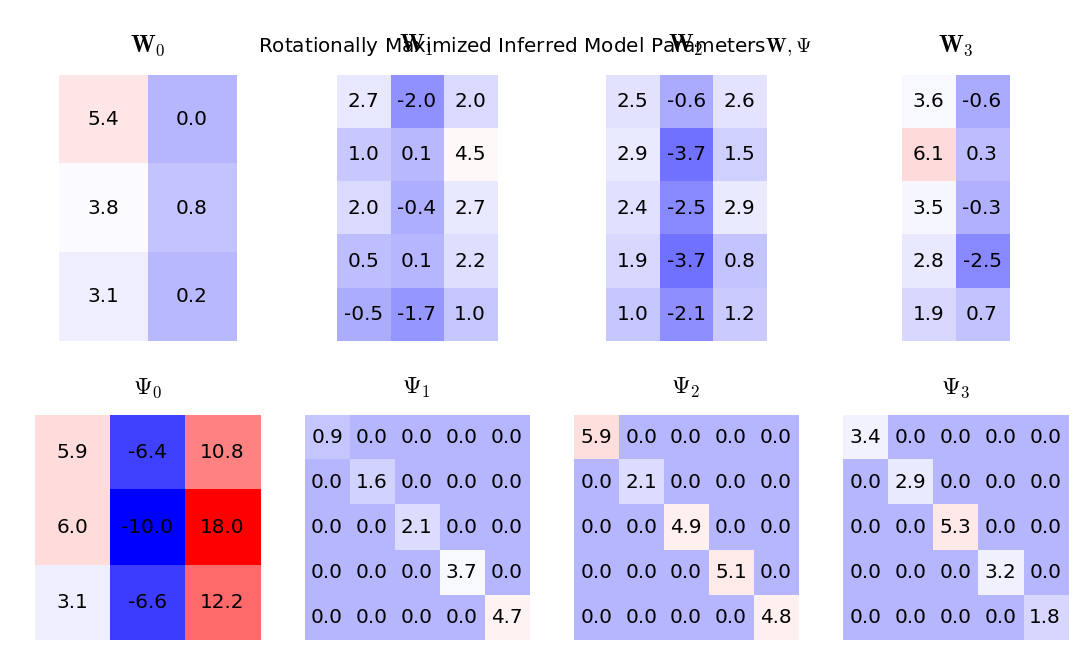

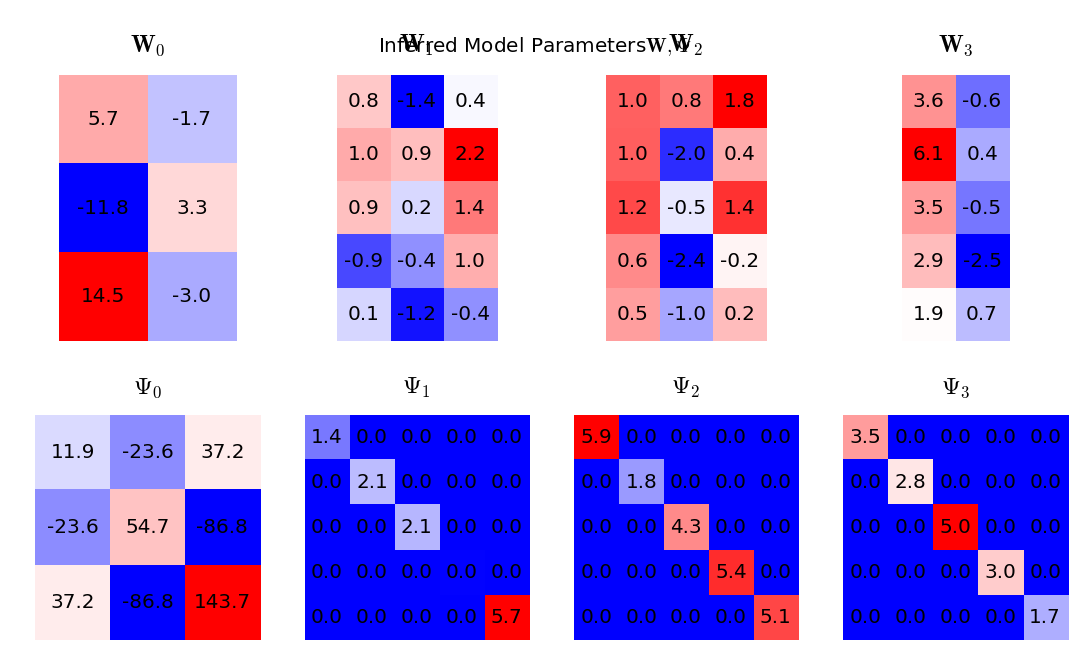

In [11]:
comparerHundredRounds.compareParameters()

Interestingly, doesn't look that much better than with less rounds in terms of parameters. $\mathbf{W}$'s now have elemnets off by more than just a column-wise sign. $\mathbf{\Psi}_0$ looks better though. 